<a href="https://colab.research.google.com/github/hmooy/Geolocation/blob/branch/geolocation_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import re

In [4]:
from google.colab import files
uploaded = files.upload()


In [0]:
id_ = []
user = []
text = []
location = []

with open('train_tweets.txt', mode = 'r', encoding = 'ISO-8859-1', newline= '\n') as file:

  for line in file:
    
    g = re.match(r'^(\d+),(.*),\"(.*)\",(\w+)', line).groups()
    id_.append(g[0])
    user.append(g[1])
    text.append(g[2])
    location.append(g[3])

  file.close()

In [0]:
train = pd.DataFrame({'id':id_,'user':user,'text':text,'label':location})

In [7]:
train[10:100]

,id,user,text,label
10,120,USER_ce270acf,@USER_ab9b724e liike 9,NewYork
11,121,USER_ce270acf,@USER_f5c280df yeah,NewYork
12,122,USER_ce270acf,You just dnt undastand _ppl just alwayss wanna...,NewYork
13,123,USER_ce270acf,RT @USER_2f5bc961: RT: @USER_ce270acf All ppl ...,NewYork
14,124,USER_ce270acf,Well boys will be boys_ and hearts will be hea...,NewYork
...,...,...,...,...
95,499,USER_4a302bbd,@USER_e551e399 :),California
96,500,USER_4a302bbd,How's everyone doing today? My morning was jus...,California
97,501,USER_4a302bbd,This Wal Mart movie is so sad! I feel bad AGAIN!,California
98,502,USER_4a302bbd,Chocolate makes my life everytime it touches m...,California


In [8]:
train['label'].value_counts()

NewYork       60810
California    20629
Georgia       15146
Name: label, dtype: int64

In [0]:
id_ = []
user = []
text = []
location = []

with open('test_tweets.txt', mode = 'r', encoding = 'ISO-8859-1', newline= '\n') as file:

  for line in file:
    
    g = re.match(r'^(\d+),(.*),\"(.*)\",(\?)', line).groups()
    id_.append(g[0])
    user.append(g[1])
    text.append(g[2])
    location.append(g[3])

  file.close()

test = pd.DataFrame({'id':id_, 'user' : user, 'text': text, 'label' : location})

In [10]:
test.head()

,id,user,text,label
0,32,USER_d12c6a27,"Who died Lee? You. Detective U? No, not u, u. ...",?
1,33,USER_d12c6a27,"R u o k?.........yea, I slipped & I fell.....a...",?
2,34,USER_d12c6a27,So cold,?
3,35,USER_d12c6a27,@USER_f7fb01ae-Oh. I was thinking bout the Cha...,?
4,36,USER_d12c6a27,Listening II Ego-Trey Songz,?


In [0]:
train_test = train.append(test, ignore_index= True)

In [0]:
tokenized_text = train_test['text'].apply(lambda x: x.split())

In [13]:
tokenized_text.head()

0                  [Forget, ma, stoopiid, friiends!!!]
1        [@USER_00791b0d, nuttiin, much_how, bout, u!]
2    [RT, @USER_00791b0d:, RT, @USER_ce270acf:, @US...
3                [@USER_e870cfe3, umm, its, souljawfy]
4                      [Smt, mommy, hurry, manqqs, :(]
Name: text, dtype: object

##Stemming the suffixes

In [14]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_text = tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x])

tokenized_text.head()

0                  [forget, ma, stoopiid, friiends!!!]
1        [@user_00791b0d, nuttiin, much_how, bout, u!]
2    [RT, @user_00791b0d:, RT, @user_ce270acf:, @us...
3                 [@user_e870cfe3, umm, it, souljawfi]
4                       [smt, mommi, hurri, manqq, :(]
Name: text, dtype: object

In [0]:
for i in range(len(tokenized_text)):
  tokenized_text[i] = ' '.join(tokenized_text[i])

train_test['clean_text'] = tokenized_text

In [16]:
train_test['clean_text']

0                            forget ma stoopiid friiends!!!
1                   @user_00791b0d nuttiin much_how bout u!
2         RT @user_00791b0d: RT @user_ce270acf: @user_00...
3                           @user_e870cfe3 umm it souljawfi
4                                  smt mommi hurri manqq :(
                                ...                        
129557    RT @user_bc060c02: goin out tonite----]]wher t...
129558    RT @user_8d476913: @user_7f5be0d9 dem sound de...
129559           Mi need yuh fi put mi to sleep like nyquil
129560       musicplayin# she tell mi she nah let goooo!!!!
129561                                            blah blah
Name: clean_text, Length: 129562, dtype: object

(-0.5, 799.5, 499.5, -0.5)

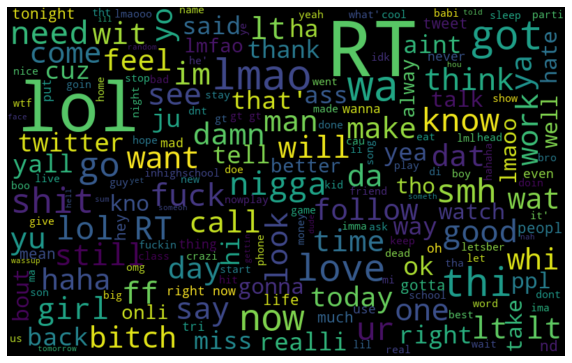

In [17]:
import matplotlib.pyplot as plt

all_words = ' '.join([text for text in train_test['clean_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [0]:
NewYork_words = ' '.join([text for text in train_test['clean_text'][train_test['label']== 'NewYork']])

(-0.5, 799.5, 499.5, -0.5)

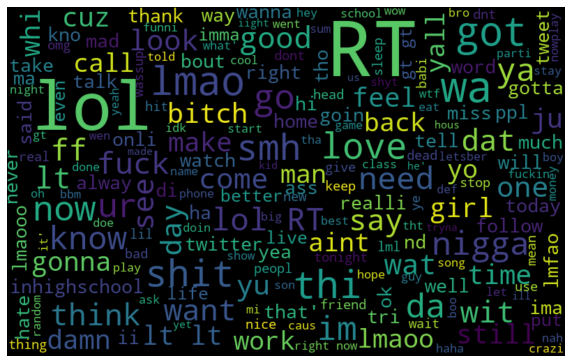

In [19]:
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 110).generate(NewYork_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

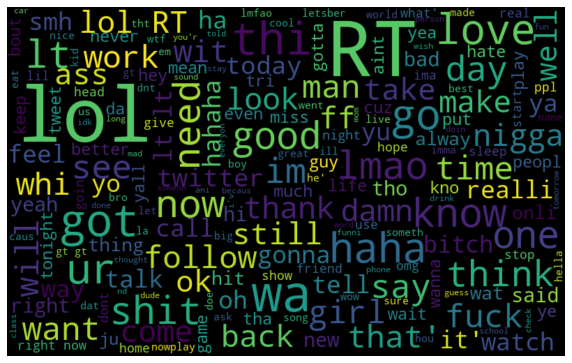

In [20]:
California_words = ' '.join([text for text in train_test['clean_text'][train_test['label']== 'California']])
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 110).generate(California_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


(-0.5, 799.5, 499.5, -0.5)

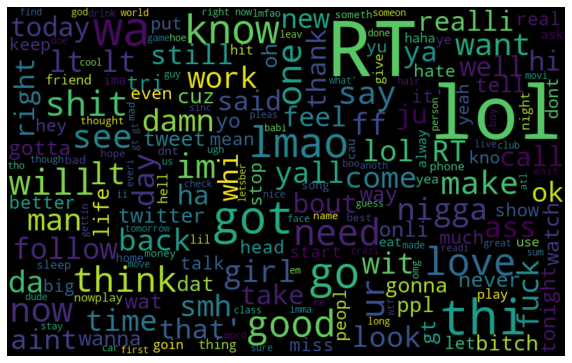

In [21]:
Georgia_words = ' '.join([text for text in train_test['clean_text'][train_test['label'] == 'Georgia']])
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 110).generate(Georgia_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

## function to collect hashtags


In [0]:
def hashtag_extract(x):

  hashtags = []

  for i in x:
    ht = re.findall(r'#(\w+)', i)
    hashtags.append(ht)
  
  return hashtags
  

In [0]:
HT_NewYork = hashtag_extract(train_test['clean_text'][train_test['label'] == 'NewYork'])

HT_California = hashtag_extract(train_test['clean_text'][train_test['label'] == 'California'])

HT_Georgia= hashtag_extract(train_test['clean_text'][train_test['label'] == 'Georgia'])

In [0]:
HT_NewYork = sum(HT_NewYork, [])
HT_California = sum(HT_California, [])
HT_Georgia = sum(HT_Georgia, [])

[Text(0, 0.5, 'Count')]

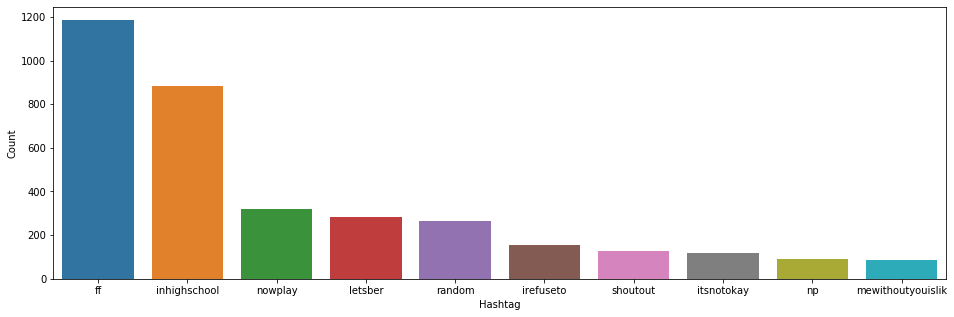

In [25]:
import seaborn as sns
import nltk

a = nltk.FreqDist(HT_NewYork)

d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))

ax = sns.barplot(data = d, x = "Hashtag", y = "Count")

ax.set(ylabel='Count')



[Text(0, 0.5, 'Count')]

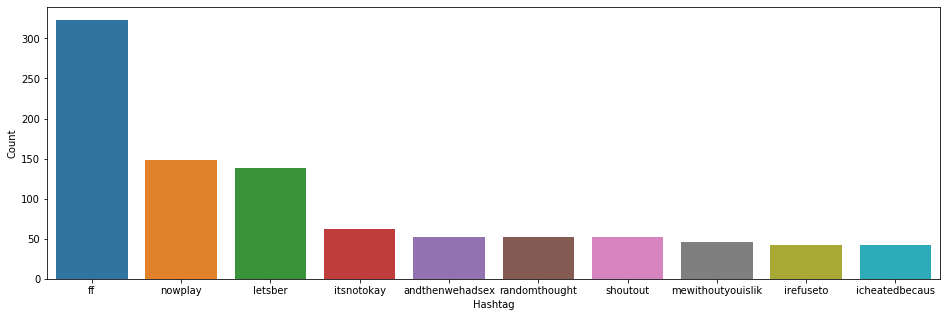

In [26]:
b = nltk.FreqDist(HT_California)

e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

e = e.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))

ax = sns.barplot(data = e, x = "Hashtag", y = "Count")

ax.set(ylabel='Count')


[Text(0, 0.5, 'Count')]

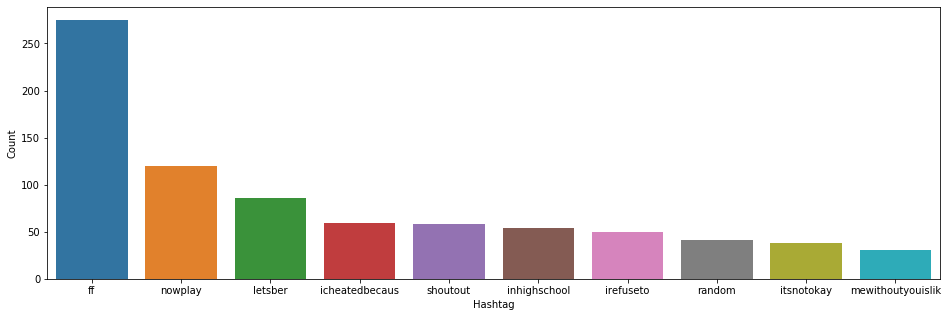

In [27]:
c = nltk.FreqDist(HT_Georgia)

f = pd.DataFrame({'Hashtag': list(c.keys()), 'Count': list(c.values())})

f = f.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))

ax = sns.barplot(data = f, x = "Hashtag", y = "Count")

ax.set(ylabel='Count')

## Bag of words

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df = 0.9, min_df = 2, max_features = 1000, stop_words = 'english')

bow = bow_vectorizer.fit_transform(train_test['clean_text'])

## TF-IDF

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')

tfidf = tfidf_vectorizer.fit_transform(train_test['clean_text'])

In [30]:
tfidf.todense()[0]

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

##Build model


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import SVC


 train_bow = bow[:len(train),:]
 test_bow = bow[len(train):,:]
 train_label = train['label']


some_bow = bow[:len(train),:]
some_label = train['label']

svm_clf = SVC()
svm_clf.fit(some_bow,some_label)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
some_label = some_bow[20:21]

In [41]:
svm_clf.predict(some_label)

array(['NewYork'], dtype=object)

In [43]:
some_digit_scores = svm_clf.decision_function(some_label)
some_digit_scores

array([[ 0.95786312, -0.2237903 ,  2.22876298]])

In [0]:
test_bow = bow[len(train):,:]
prediction = svm_clf.predict(test_bow)

In [47]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [48]:
import joblib

my_model = svm_clf

joblib.dump(my_model, 'svm_model.pkl')

['svm_model.pkl']

In [0]:
import torch
path = F"/content/gdrive/My Drive/Colab Notebooks/Oreilly Machine Learning/{'svm_model'}"
torch.save(my_model, path)

In [0]:
result = pd.DataFrame({'tweet-id':test['id'],'class':prediction})

In [0]:
result.to_csv('svm_result.csv', index = None)

In [0]:
!cp svm_result.csv "/content/gdrive/My Drive/Colab Notebooks/Oreilly Machine Learning/"